<a href="https://colab.research.google.com/github/diegocontadorgf/Learning/blob/main/Delincuencia_Mexico_Modelo_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>
    Análisis de Incidencia Delictiva Municipial en México 2015-2024 y el desarrollo de un modelo predictivo con redes neuronales utilizando datos geoespaciales
</h1>
<h2>
    Autor: Diego González Farias
</h2>

El siguiente proyecto de investigación se basa en los datos obtenidos en [Datos Abiertos Gobierno de México](https://www.gob.mx/sesnsp/acciones-y-programas/datos-abiertos-de-incidencia-delictiva) con la finalidad de realizar un modelo que pueda predecir la cantidad de delitos que ocurrirán por entidad, así como su tipo de delito, basado en datos históricos de delincuencia municipal mensual de 2015 a octubre de 2024.


## **Análisis exploratorio de Datos**

### Carga de datos y transformacion

De manera inicial se busca el conocer los datos con los que se trabajara para poder visualizar datos estadísticos descriptivos, tendencias, relaciones e identificar las principales variables que se usaran en la creación del modelo predictivo.

In [1]:
#Importo librerias inicialmente para EDA o Exploratory Data Analysis
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import warnings

warnings.filterwarnings("ignore")
import folium
from folium.plugins import HeatMap

In [24]:
#Extraemos el archivo

data_delic = pd.read_csv("IDM_NM_oct24.csv", encoding='latin-1')  # Prueba con 'latin-1'


In [25]:
#Visualizamos las primeras filas del archivo
data_delic.head()


Año  Clave_Ent         Entidad  Cve. Municipio       Municipio  \
0  2015          1  Aguascalientes            1001  Aguascalientes   
1  2015          1  Aguascalientes            1001  Aguascalientes   
2  2015          1  Aguascalientes            1001  Aguascalientes   
3  2015          1  Aguascalientes            1001  Aguascalientes   
4  2015          1  Aguascalientes            1001  Aguascalientes   

             Bien jurídico afectado Tipo de delito  Subtipo de delito  \
0  La vida y la Integridad corporal      Homicidio   Homicidio doloso   
1  La vida y la Integridad corporal      Homicidio   Homicidio doloso   
2  La vida y la Integridad corporal      Homicidio   Homicidio doloso   
3  La vida y la Integridad corporal      Homicidio   Homicidio doloso   
4  La vida y la Integridad corporal      Homicidio  Homicidio culposo   

           Modalidad  Enero  ...  Marzo  Abril  Mayo  Junio  Julio  Agosto  \
0  Con arma de fuego      2  ...      1      1     0      1      1       0   
1    Con arma blanca      1  ...      0      0     0      1      0       1   
2  Con otro elemento      0  ...      1      1     3      2      0       1   
3    No especificado      1  ...      0      1     0      0      0       0   
4  Con arma de fuego      0  ...      0      0     1      0      0       0   

   Septiembre  Octubre  Noviembre  Diciembre  
0           2        1        0.0        1.0  
1           0        0        0.0        0.0  
2           2        0        0.0        0.0  
3           0        0        0.0        0.0  
4           0        0        0.0        0.0  

[5 rows x 21 columns]

In [4]:
data_delic.shape

(185123, 21)

In [5]:
#Columnas de las cuales se compone el archivo
data_delic.columns

Index(['Año', 'Clave_Ent', 'Entidad', 'Cve. Municipio', 'Municipio',
       'Bien jurídico afectado', 'Tipo de delito', 'Subtipo de delito',
       'Modalidad', 'Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
       'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'],
      dtype='object')

In [6]:
#Información de como esta compuesto el archivo
data_delic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185123 entries, 0 to 185122
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Año                     185123 non-null  int64  
 1   Clave_Ent               185123 non-null  int64  
 2   Entidad                 185123 non-null  object 
 3   Cve. Municipio          185123 non-null  int64  
 4   Municipio               185123 non-null  object 
 5   Bien jurídico afectado  185123 non-null  object 
 6   Tipo de delito          185122 non-null  object 
 7   Subtipo de delito       185122 non-null  object 
 8   Modalidad               185122 non-null  object 
 9   Enero                   185122 non-null  float64
 10  Febrero                 185122 non-null  float64
 11  Marzo                   185122 non-null  float64
 12  Abril                   185122 non-null  float64
 13  Mayo                    185122 non-null  float64
 14  Junio               

In [26]:
#Identificar los años incluidos
data_delic["Año"].unique()

array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])

El archivo incluye los meses en cada columna con un formato ancho ("wide"), sin embargo para realizar el análisis de datos es conveniente tener los meses como filas para poder crear visualizaciones y modelado.

In [27]:

#Se realiza una división por Mes y se agrega una columna que muestra la "Cantidad" de delitos según cada modalidad

data_delic_long = pd.melt(
    data_delic,
    id_vars=[
        "Año", "Clave_Ent", "Entidad", "Cve. Municipio", "Municipio",
        "Bien jurídico afectado", "Tipo de delito", "Subtipo de delito", "Modalidad"
    ],
    value_vars=[
        "Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio",
        "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"
    ],
    var_name="Mes",
    value_name="Cantidad"
)




In [28]:
# Se realizara un "mapeo" para poder representar los meses de manera numerica
meses = {
    "Enero": 1, "Febrero": 2, "Marzo": 3, "Abril": 4, "Mayo": 5, "Junio": 6,
    "Julio": 7, "Agosto": 8, "Septiembre": 9, "Octubre": 10, "Noviembre": 11, "Diciembre": 12
}

# Mapear los nombres de los meses a números
data_delic_long["Mes"] = data_delic_long["Mes"].map(meses)

In [29]:
data_delic_long.head()


Año  Clave_Ent         Entidad  Cve. Municipio       Municipio  \
0  2015          1  Aguascalientes            1001  Aguascalientes   
1  2015          1  Aguascalientes            1001  Aguascalientes   
2  2015          1  Aguascalientes            1001  Aguascalientes   
3  2015          1  Aguascalientes            1001  Aguascalientes   
4  2015          1  Aguascalientes            1001  Aguascalientes   

             Bien jurídico afectado Tipo de delito  Subtipo de delito  \
0  La vida y la Integridad corporal      Homicidio   Homicidio doloso   
1  La vida y la Integridad corporal      Homicidio   Homicidio doloso   
2  La vida y la Integridad corporal      Homicidio   Homicidio doloso   
3  La vida y la Integridad corporal      Homicidio   Homicidio doloso   
4  La vida y la Integridad corporal      Homicidio  Homicidio culposo   

           Modalidad  Mes  Cantidad  
0  Con arma de fuego    1       2.0  
1    Con arma blanca    1       1.0  
2  Con otro elemento    1       0.0  
3    No especificado    1       1.0  
4  Con arma de fuego    1       0.0

In [30]:
data_delic_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27828864 entries, 0 to 27828863
Data columns (total 11 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Año                     int64  
 1   Clave_Ent               int64  
 2   Entidad                 object 
 3   Cve. Municipio          int64  
 4   Municipio               object 
 5   Bien jurídico afectado  object 
 6   Tipo de delito          object 
 7   Subtipo de delito       object 
 8   Modalidad               object 
 9   Mes                     int64  
 10  Cantidad                float64
dtypes: float64(1), int64(4), object(6)
memory usage: 2.3+ GB


In [31]:
#Realizaremos un tipo de dato que optimize la tabla por la cantidad de filas generadas


data_delic_long = data_delic_long.astype({
    "Año": "int16",  # Rango suficiente para años
    "Clave_Ent": "int8",  # Rango suficiente para claves de entidad (0-255)
    "Cve. Municipio": "int16",  # Rango suficiente para municipios
    "Mes": "int8",  # Solo valores de 1 a 12
    "Cantidad": "float32"  # Reducir el tamaño de los flotantes
})


categorical_columns = [
    "Entidad", "Municipio", "Bien jurídico afectado",
    "Tipo de delito", "Subtipo de delito", "Modalidad"
]
data_delic_long[categorical_columns] = data_delic_long[categorical_columns].astype("category")


In [32]:
#El formato ancho constaba de 21 columnas y 2,319,072 filas
data_delic.shape

(2319072, 21)

In [33]:
#El formato "largo" a usarse consta de 11 columnas y 278,288,864 filas
data_delic_long.shape

(27828864, 11)

In [34]:
data_delic_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27828864 entries, 0 to 27828863
Data columns (total 11 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   Año                     int16   
 1   Clave_Ent               int8    
 2   Entidad                 category
 3   Cve. Municipio          int16   
 4   Municipio               category
 5   Bien jurídico afectado  category
 6   Tipo de delito          category
 7   Subtipo de delito       category
 8   Modalidad               category
 9   Mes                     int8    
 10  Cantidad                float32 
dtypes: category(6), float32(1), int16(2), int8(2)
memory usage: 451.3 MB


La transformación realizada de formato "ancho" a "largo" redujo el numero de columnas en -10 pero realizo un aumento de filas en 276 millones aprox.


Dado que estamos trabajando con datos temporales se crea la columna "Fecha" para representar el tiempo en que sucede cada fila.
El día no se encuentra presente en el set de datos por lo que se pondra por default el primero de cada mes.

In [35]:
data_delic_long["Fecha"] = pd.to_datetime(
    data_delic_long["Año"].astype(str) + '-' + data_delic_long["Mes"].astype(str) + '-01',
    format='%Y-%m-%d',  # Formato año-mes-día
    errors="coerce"  # Coerción de errores en caso de valores mal formados
)




In [36]:

#Existia un ruido visual en los datos al gráficar por lo que se filtra todas las fechas posterioes a octubre 2024
data_delic_long = data_delic_long[data_delic_long["Fecha"] <= "2024-10-31"]


### Composición de los datos

Para conocer los datos vamos a comenzar respondiendo preguntas como ¿Cuantos tipos de delitos están registrados?, ¿Cuales son los delitos con más frecuencia? ,etc...

In [37]:
columnas_interes = [
    "Entidad",
    "Municipio",
    "Bien jurídico afectado",
    "Tipo de delito",
    "Subtipo de delito",
    "Modalidad"
]

conteo_unicos = data_delic_long[columnas_interes].nunique()

print(conteo_unicos)

Entidad                     32
Municipio                 2334
Bien jurídico afectado       7
Tipo de delito              40
Subtipo de delito           55
Modalidad                   59
dtype: int64


El registro histórico de delincuencia de Enero 2015 a Octubre 2024 esta compuesto por la información delictiva de 32 Estados, 2334 Municipios dividido por:

- 40 Tipos de Delitos
- 55 Subtipos de Delitos
- 59 Modalidades
- 7 Tipos de bienes afectados

**¿Cuáles son los delitos más comunes?**

In [38]:
# Top tipo de delito
top_tipos_delito = (
    data_delic_long.groupby("Tipo de delito")["Cantidad"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

#Top subtipos de delito
top_subtipos_delito = (
    data_delic_long.groupby("Subtipo de delito")["Cantidad"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

#Top por modalidad
top_modalidades = (
    data_delic_long.groupby("Modalidad")["Cantidad"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# Orden por bien afectado
top_bienes_afectados = (
    data_delic_long.groupby("Bien jurídico afectado")["Cantidad"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

# Formato a tabla para visualización
def formatear_tabla(data, nombre):
    print(f"\n--- {nombre} ---")
    return data.style.format({"Cantidad": "{:,.0f}"})


display(formatear_tabla(top_tipos_delito, "Top 10 Tipos de Delitos"))
display(formatear_tabla(top_subtipos_delito, "Top 10 Subtipos de Delitos"))
display(formatear_tabla(top_modalidades, "Top 10 Modalidades"))
display(formatear_tabla(top_bienes_afectados, "Top 10 Bienes Jurídicos Afectados"))


--- Top 10 Tipos de Delitos ---



--- Top 10 Subtipos de Delitos ---



--- Top 10 Modalidades ---



--- Top 10 Bienes Jurídicos Afectados ---


### Tendencia en los ultimos años

Para un primer visual y conocer como se ha comportado el indice delictivo a lo largo de los ultimos años crearemos una linea de tiempo tomando en cuenta la suma de todos los tipos de delitos registrados.

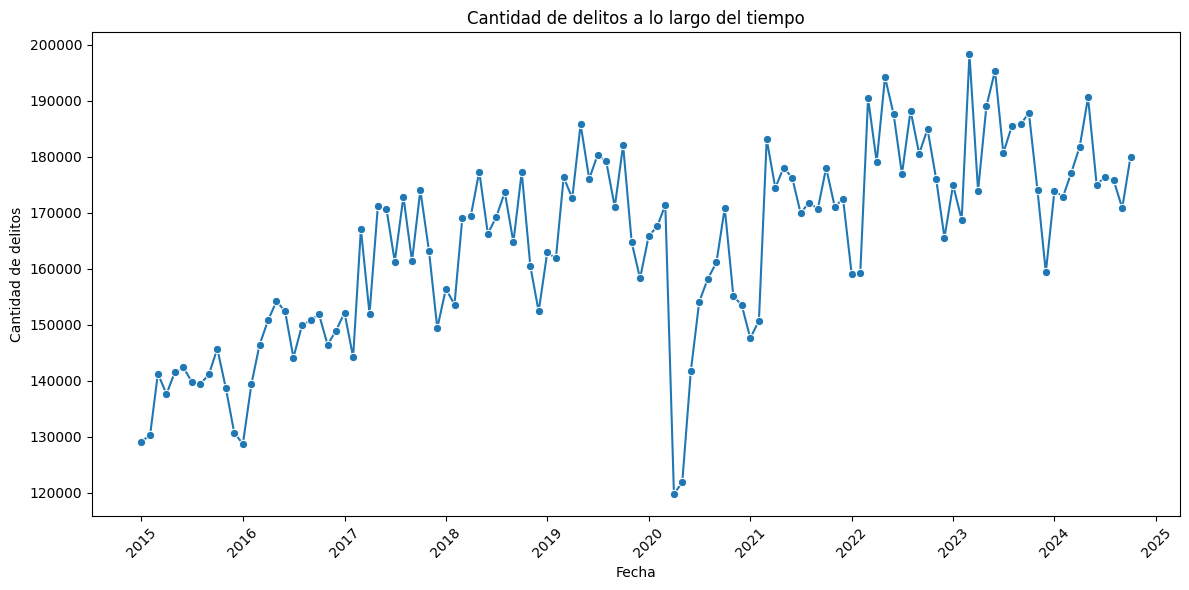

In [40]:

import seaborn as sns


#Agrupamos los datos por Fecha y Cantidad de delitos
delitos_por_fecha = data_delic_long.groupby(["Fecha"])["Cantidad"].sum().reset_index()


plt.figure(figsize=(12, 6))
sns.lineplot(data=delitos_por_fecha, x="Fecha", y="Cantidad", marker="o")
plt.title("Cantidad de delitos a lo largo del tiempo")
plt.xlabel("Fecha")
plt.ylabel("Cantidad de delitos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Observando el gráfico anterior podemos visualizar 3 puntos a simple vista:

- 1- Una tendencia ascendente a lo largo del tiempo, es decir, los delitos van en aumento conforme pasa el tiempo.
- 2- Una caida abrupta en los delitos a inicios de 2020, dicha caida es causada por la pandemia COVID-19
- 3- Una estacionalidad en los años con un patron ciclico.

### Top 10 tipos de delitos en los ultimos años

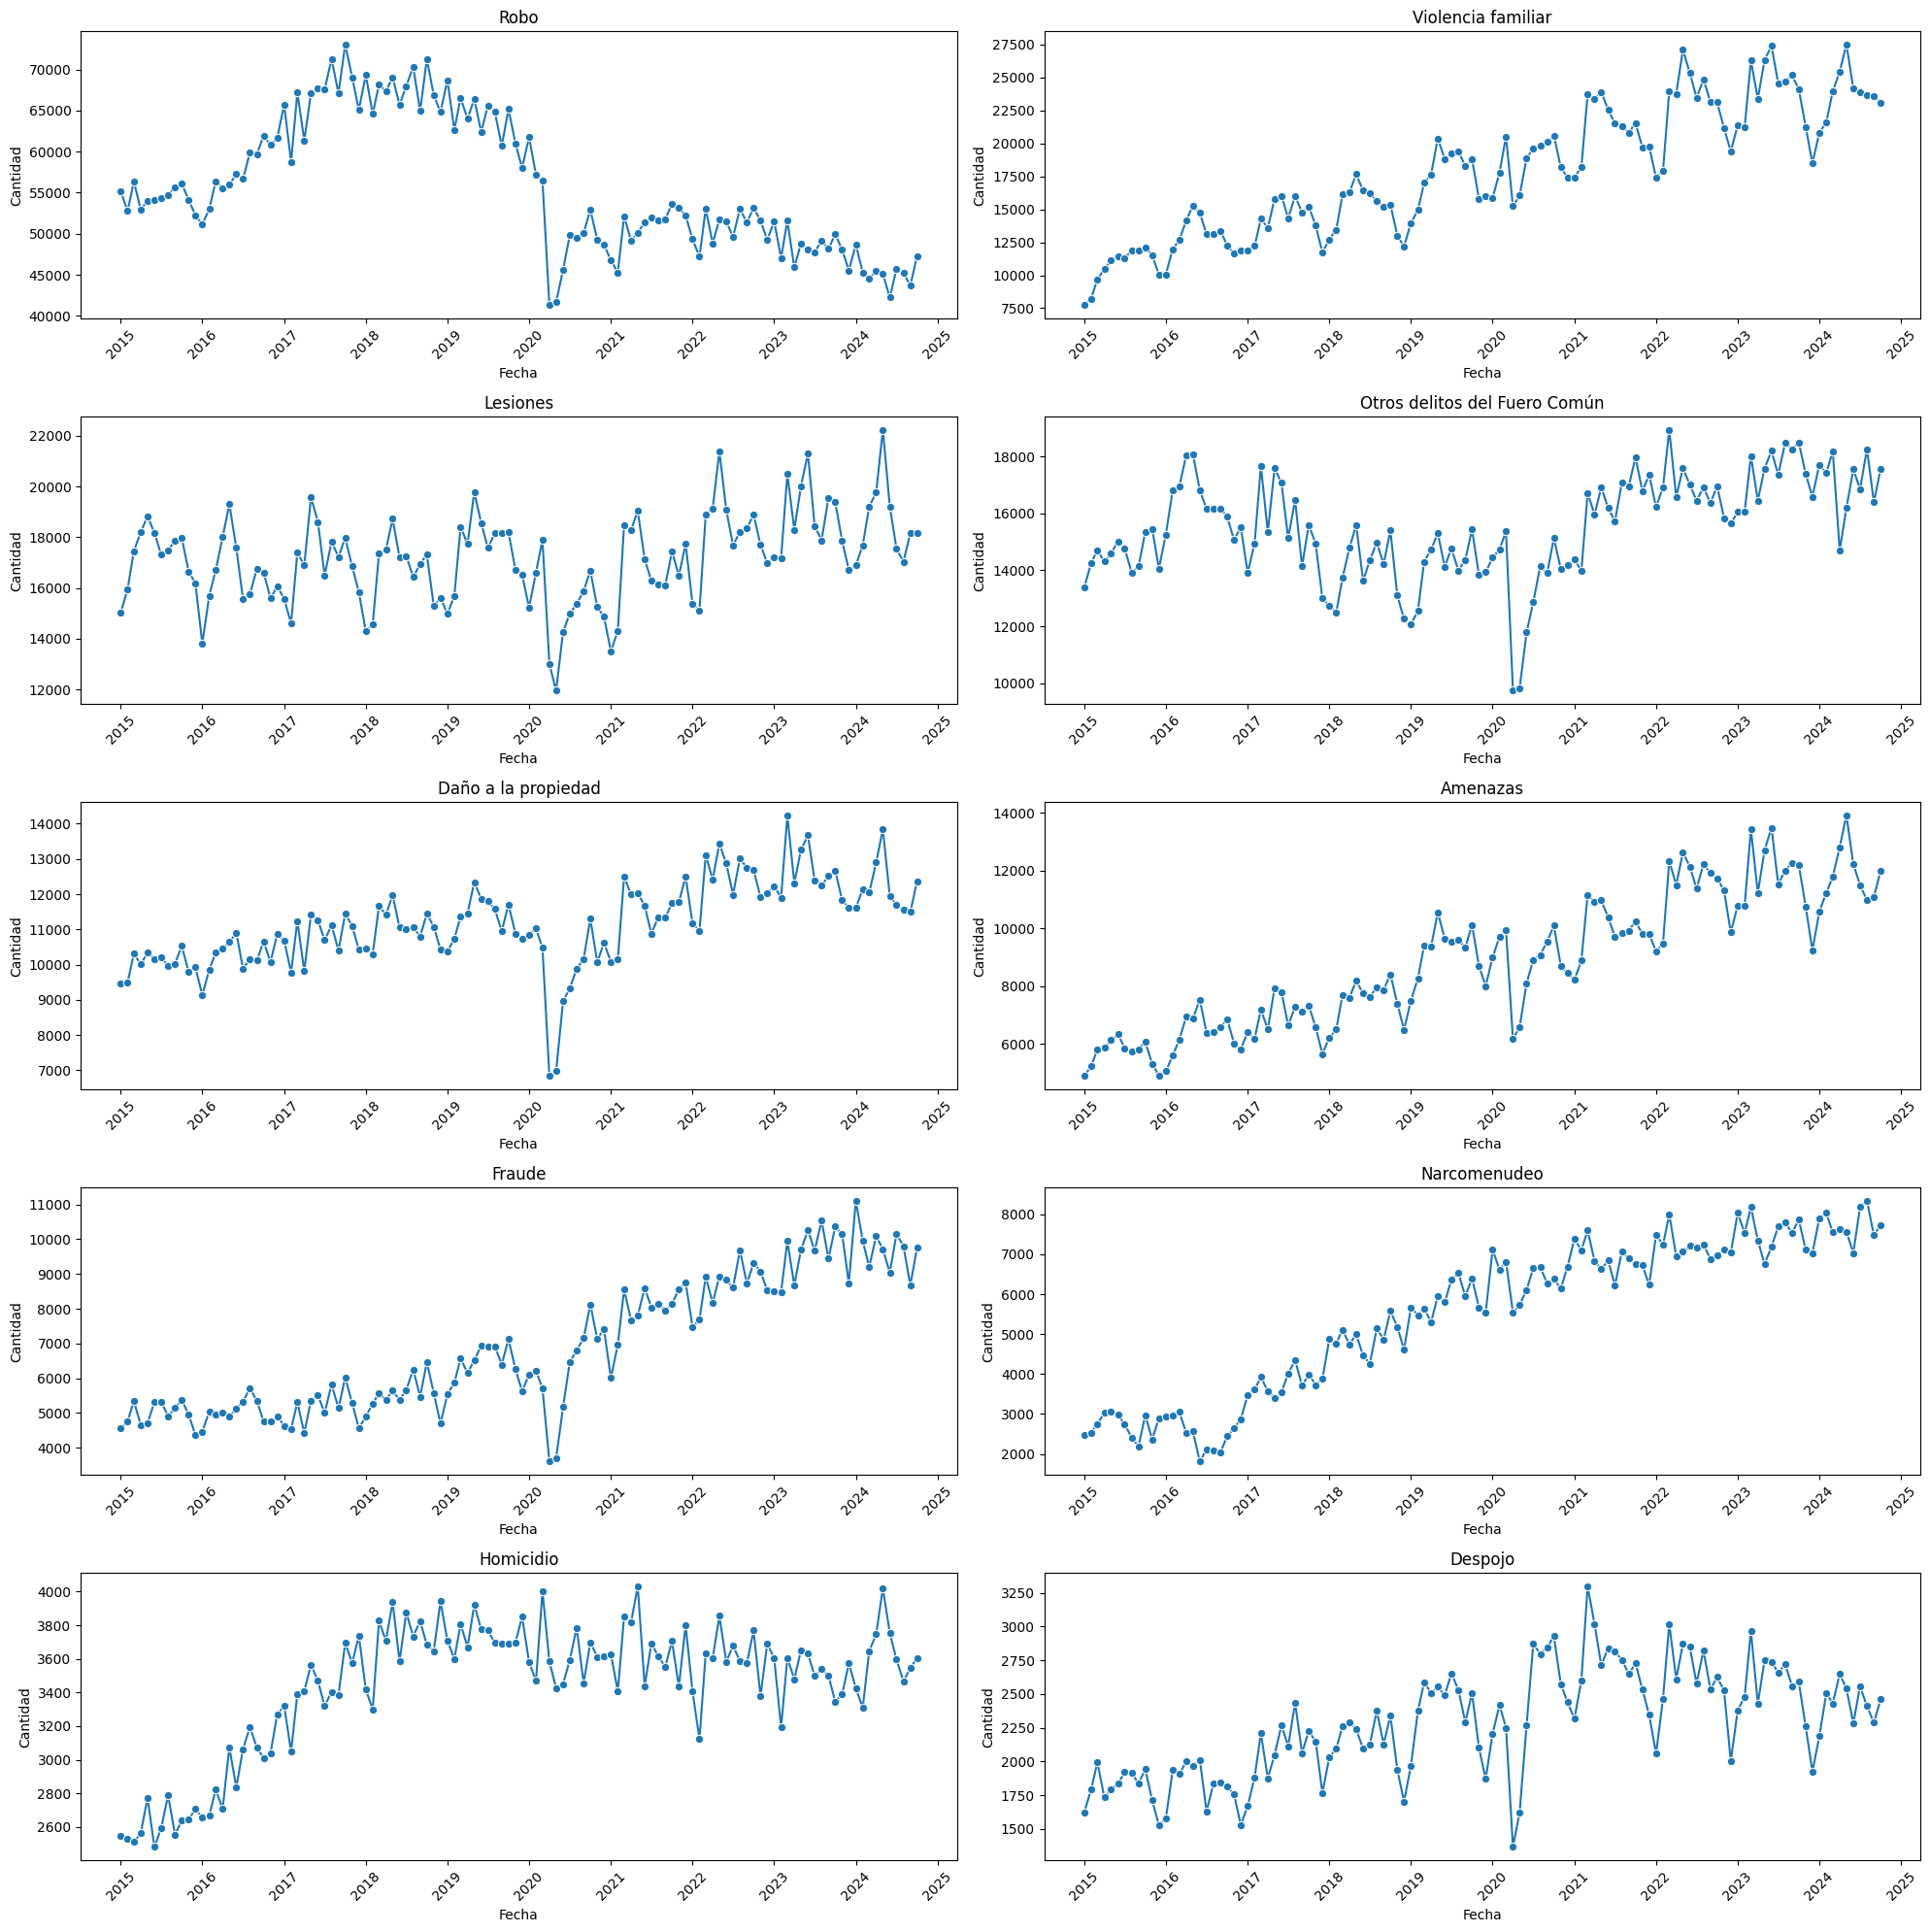

In [41]:
data_agrupada = (
    data_delic_long.groupby(["Fecha", "Tipo de delito"])["Cantidad"]
    .sum()
    .reset_index()
)


top_tipos_delito = (
    data_delic_long.groupby("Tipo de delito")["Cantidad"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)


data_top10 = data_agrupada[data_agrupada["Tipo de delito"].isin(top_tipos_delito)]


fig, axes = plt.subplots(5, 2, figsize=(20, 20))  # Grid de 5 filas x 2 columnas
axes = axes.flatten()  # Aplanar para iterar más fácilmente

for i, delito in enumerate(top_tipos_delito):
    ax = axes[i]
    # Filtrar los datos del delito actual
    data_delito = data_top10[data_top10["Tipo de delito"] == delito]
    # Graficar
    sns.lineplot(data=data_delito, x="Fecha", y="Cantidad", ax=ax, marker="o")
    ax.set_title(delito)
    ax.set_xlabel("Fecha")
    ax.set_ylabel("Cantidad")
    ax.tick_params(axis="x", rotation=45)  # Rotar etiquetas del eje X

# Ajustar diseño para evitar solapamiento
plt.tight_layout()
plt.show()

La tendencia al alza se puede observar en 9 de los 10 delitos más comunes registrados teniendo como la excepción "Robo" el cual es el delito con mayor numero de incidencias históricas pero que en los ultimos años de acuerdo a los datos gubernamentales presenta una disminución, si bien dicha disminución es cuestionable no se ahondará en la exploración de estos datos de momento.

### Cantidad de delitos por Estado

Es de interes también el conocer la distribución de delitos por Entidad, en el siguiente gráfico encontramos que en los ultimos años la cantidad de delitos el Estado de méxico y Ciudad de México conforman la mayor frecuencia en base a los delitos históricos registrados.

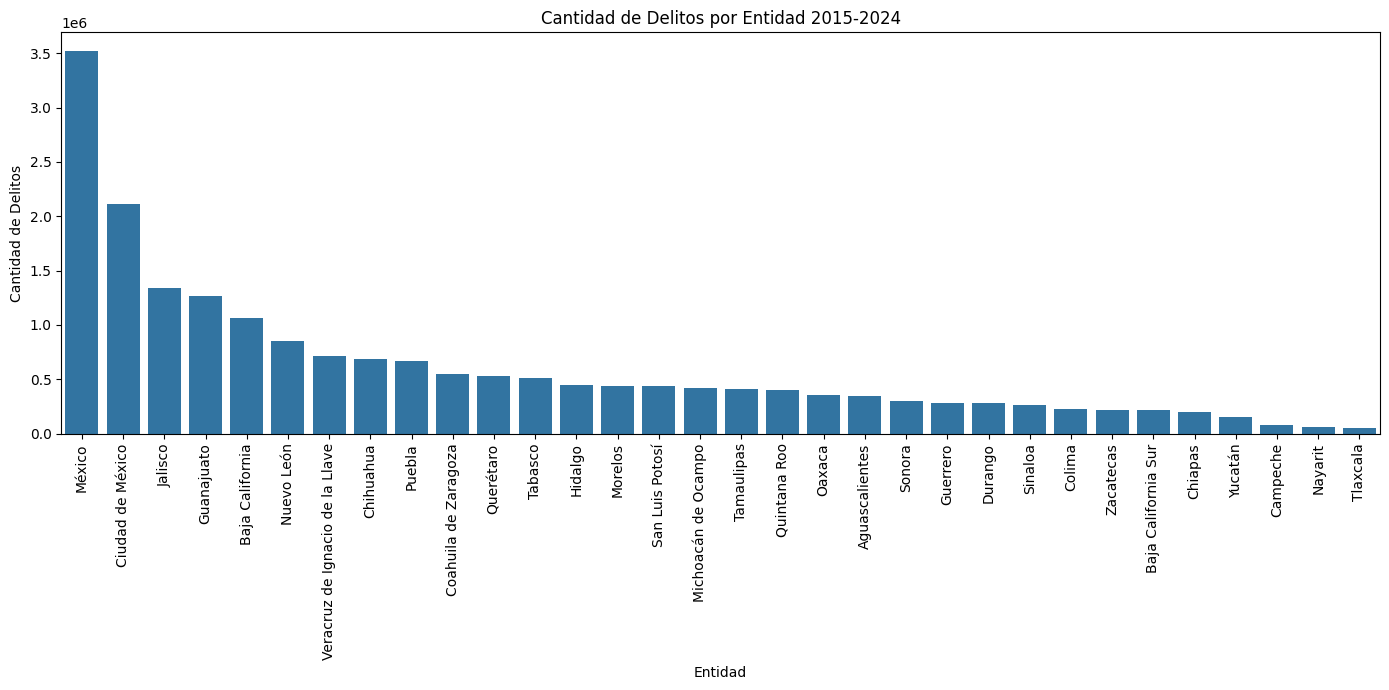

In [62]:
# Gráfico de la cantidad de delitos por entidad

delitos_por_entidad = data_delic_long.groupby(["Entidad"])["Cantidad"].sum().reset_index()
delitos_por_entidad=delitos_por_entidad.sort_values(by="Cantidad",ascending=False)

plt.figure(figsize=(14, 7))
sns.barplot(x="Entidad", y="Cantidad", data=delitos_por_entidad, estimator="sum", ci=None,order=delitos_por_entidad["Entidad"])
plt.title("Cantidad de Delitos por Entidad 2015-2024")
plt.xlabel("Entidad")
plt.ylabel("Cantidad de Delitos")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [58]:
delitos_por_entidad["Cantidad"] = delitos_por_entidad["Cantidad"].apply(lambda x: f"{x:,.2f}")
delitos_por_entidad

Entidad      Cantidad
16                           México  3,517,626.00
6                  Ciudad de México  2,114,668.00
13                          Jalisco  1,338,937.00
10                       Guanajuato  1,266,477.00
1                   Baja California  1,061,823.00
18                       Nuevo León    852,284.00
29  Veracruz de Ignacio de la Llave    714,651.00
5                         Chihuahua    683,165.00
20                           Puebla    667,387.00
7              Coahuila de Zaragoza    545,071.00
21                        Querétaro    525,600.00
26                          Tabasco    512,915.00
12                          Hidalgo    449,537.00
15                          Morelos    439,960.00
23                  San Luis Potosí    438,688.00
14              Michoacán de Ocampo    423,751.00
27                       Tamaulipas    408,414.00
22                     Quintana Roo    397,245.00
19                           Oaxaca    353,692.00
0                    Aguascalientes    345,134.00
25                           Sonora    303,098.00
11                         Guerrero    285,579.00
9                           Durango    279,362.00
24                          Sinaloa    261,502.00
8                            Colima    226,953.00
31                        Zacatecas    218,957.00
2               Baja California Sur    217,612.00
4                           Chiapas    197,919.00
30                          Yucatán    151,902.00
3                          Campeche     81,147.00
17                          Nayarit     64,072.00
28                         Tlaxcala     52,669.00

Es de interes conocer la tendencia actual por lo que se realizará la segmentación únicamente del año en curso (2024), para conocer la tendencia de los delitos reportados en este año por Entidad.

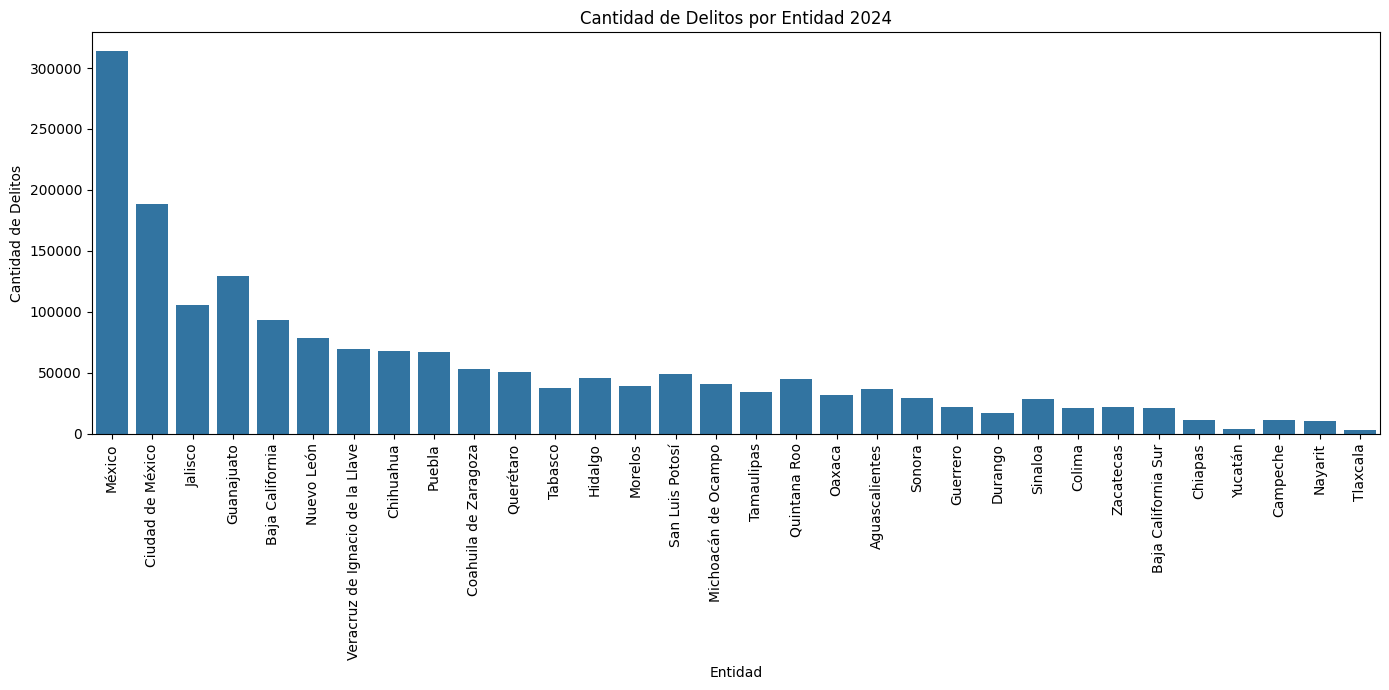

In [73]:
delitos_por_entidad_2024=data_delic_long[data_delic_long["Año"]==2024]
delitos_por_entidad_2024 = delitos_por_entidad_2024.groupby(["Entidad"])["Cantidad"].sum().reset_index()
delitos_por_entidad_2024=delitos_por_entidad_2024.sort_values(by="Cantidad",ascending=False)



plt.figure(figsize=(14, 7))
sns.barplot(x="Entidad", y="Cantidad", data=delitos_por_entidad_2024, estimator="sum", ci=None,order=delitos_por_entidad["Entidad"])
plt.title("Cantidad de Delitos por Entidad 2024")
plt.xlabel("Entidad")
plt.ylabel("Cantidad de Delitos")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

array([2024], dtype=int16)

Para realizar un analisis visual de cual ha sido el Estado con mayor cantidad de delitos registrado por año visualizaremos el top 10 de cada año incluido en los datos.

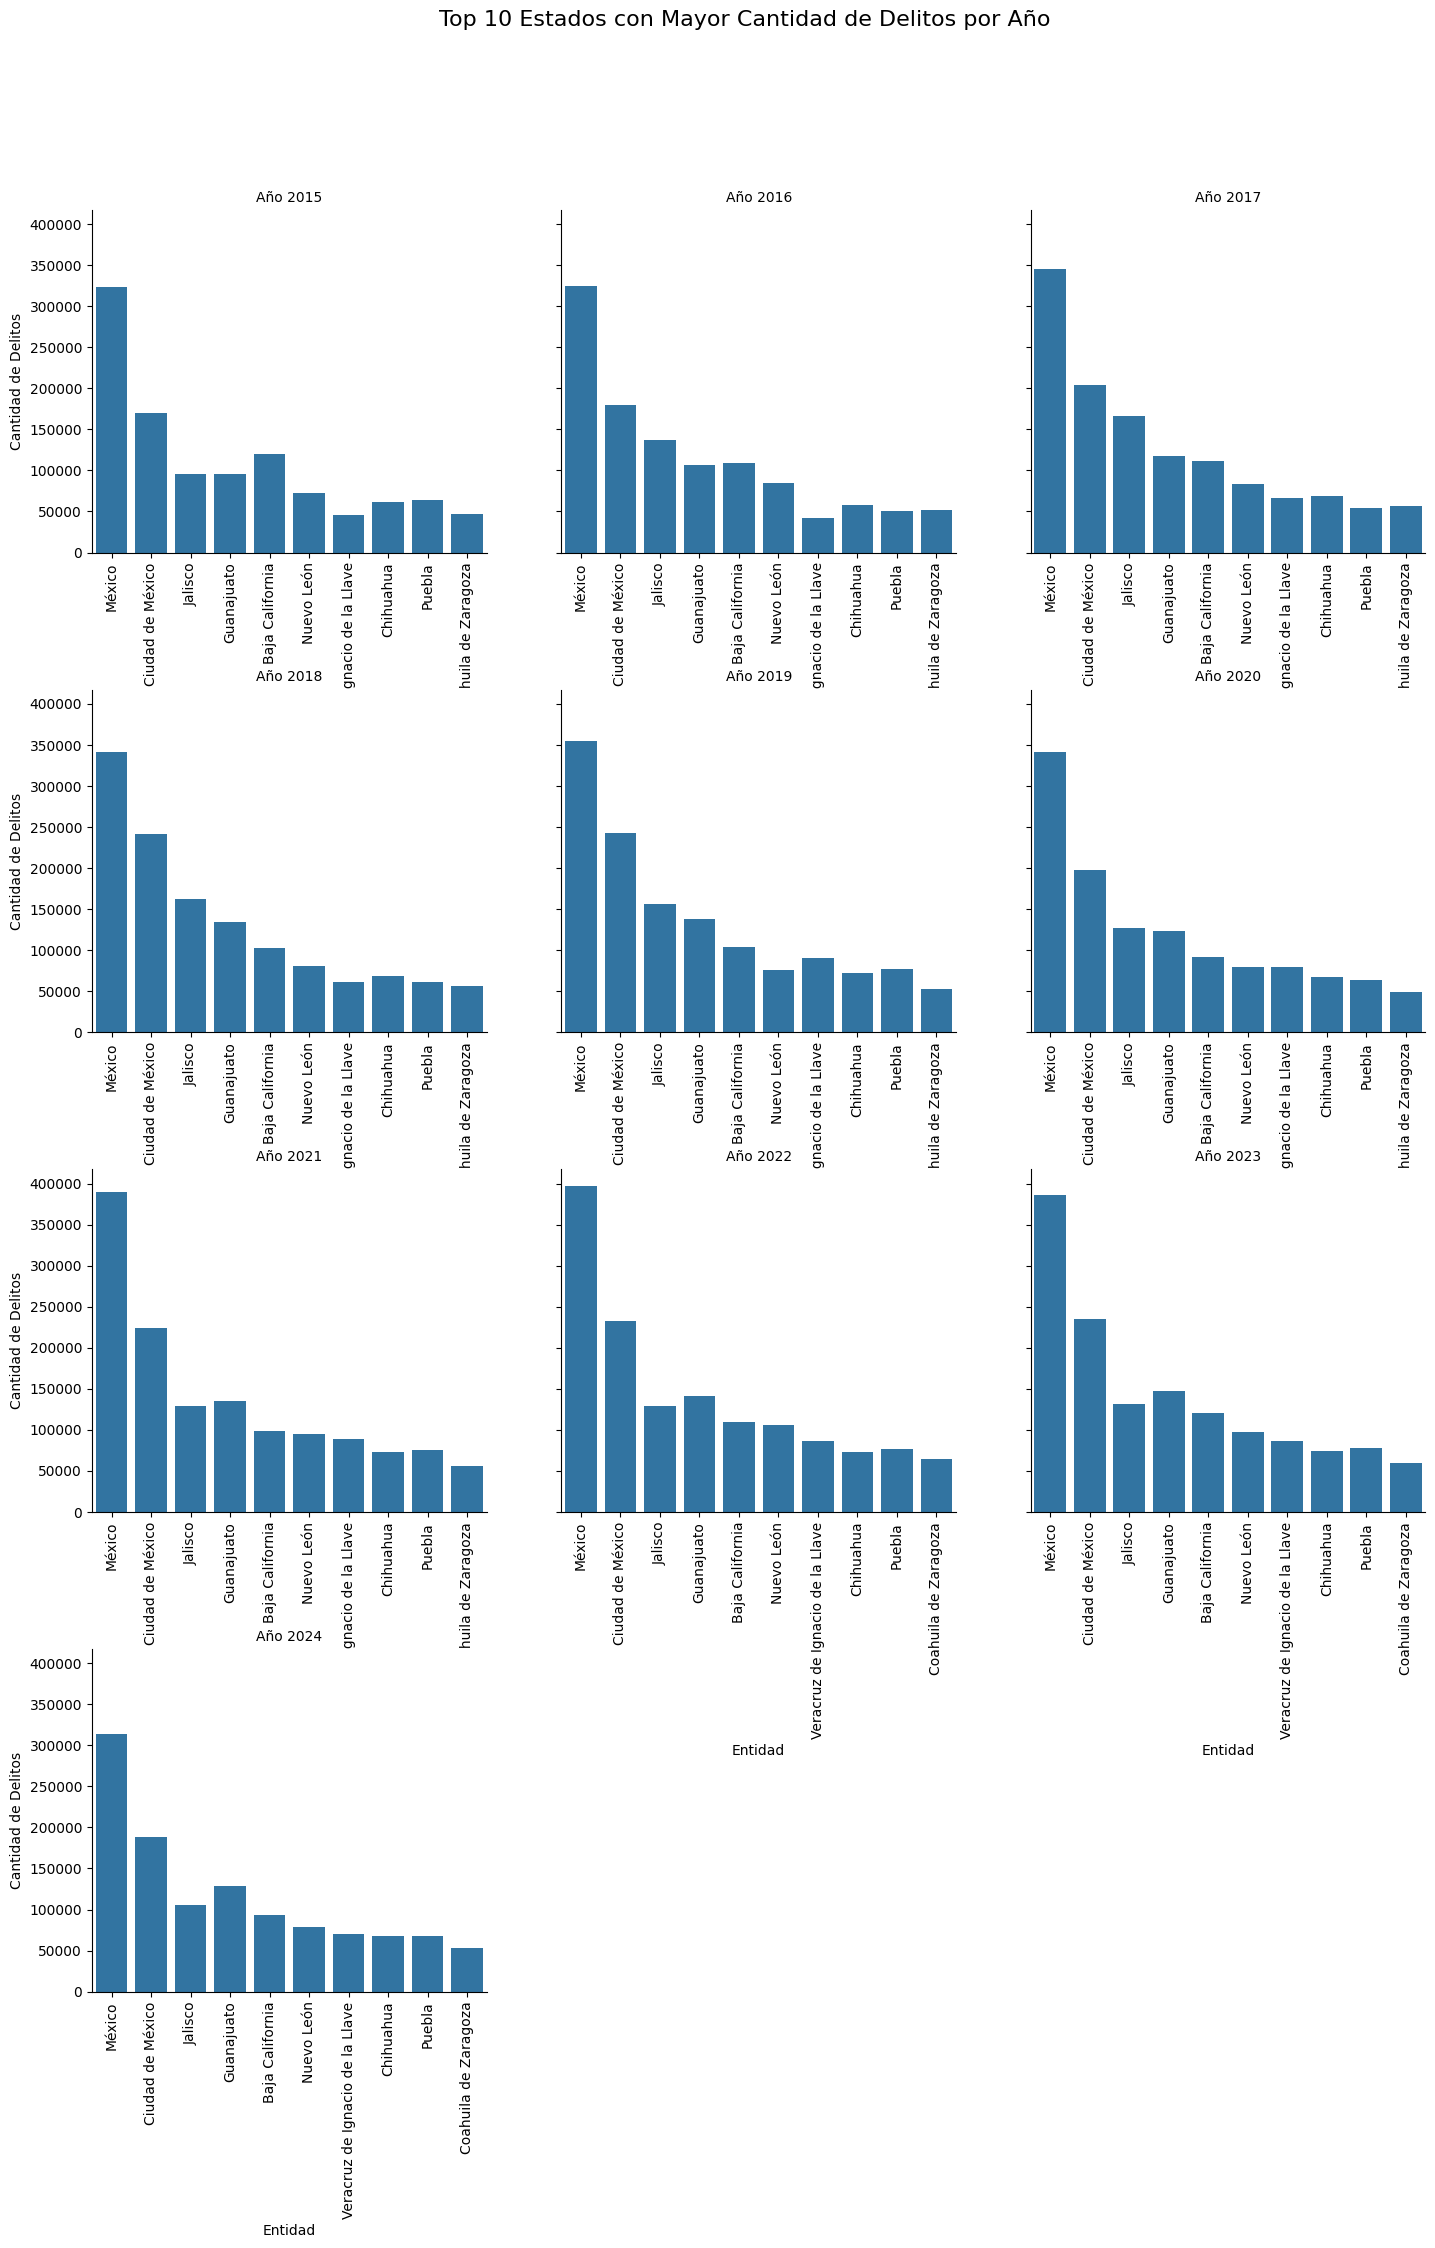

In [75]:

delitos_por_entidad_anual = data_delic_long.groupby(["Año", "Entidad"])["Cantidad"].sum().reset_index()

top_entidades = (
    delitos_por_entidad_anual.groupby("Entidad")["Cantidad"].sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)


delitos_top_10 = delitos_por_entidad_anual[delitos_por_entidad_anual["Entidad"].isin(top_entidades)]


g = sns.FacetGrid(data=delitos_top_10, col="Año", col_wrap=3, height=5, sharex=False, sharey=True)
g.map(sns.barplot, "Entidad", "Cantidad", order=top_entidades, ci=None)

g.set_titles("Año {col_name}")
g.set_axis_labels("Entidad", "Cantidad de Delitos")
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


plt.subplots_adjust(top=0.92, hspace=0.4)
g.fig.suptitle("Top 10 Estados con Mayor Cantidad de Delitos por Año", fontsize=16, y=1.02)
plt.show()

# **Integración con datos adicionales**

La información disponible en el archivo de Datos Abiertos de Incidencia Delictiva proporciona un desglose detallado de los delitos registrados, clasificados por tipo, subtipo, modalidad y otras categorías. Sin embargo, su alcance es principalmente descriptivo, ya que refleja únicamente los delitos reportados en cada entidad y municipio.

El objetivo principal de este proyecto de investigación es demostrar cómo el uso de inteligencia artificial puede contribuir significativamente a la toma de decisiones estratégicas en materia de seguridad. Para ello, se busca desarrollar un modelo predictivo que estime la cantidad de delitos por municipio, utilizando múltiples variables.

En este contexto, es fundamental enriquecer los datos actuales integrándolos con otras fuentes que puedan estar correlacionadas con los índices delictivos. En las siguientes secciones se describirá el proceso de integración de diversas bases de datos y se llevará a cabo un análisis de correlación de las variables involucradas. Este análisis permitirá identificar los estimadores más relevantes y, con base en los datos, sustentar la elección del modelo más adecuado.

### Información Geográfica

Los archivos usados en la integración geográfica se encuentran disponibles en [Biblioteca Digital de Mapas - INEGI](https://www.inegi.org.mx/app/mapas/)

Un archivo shapefile es un formato de almacenamiento de información geoespacial ampliamente utilizado en los sistemas de información geográfica (SIG). Este formato, desarrollado por Esri, consta de al menos tres archivos principales:

-  .shp: Almacena la geometría de los elementos geoespaciales, como puntos, líneas o polígonos.
- .shx: Contiene un índice que facilita el acceso rápido a la geometría.
- .dbf: Guarda atributos tabulares asociados a cada elemento geoespacial.

El uso de archivos shapefile permite incorporar información geolocalizada en el análisis. Esto es fundamental para identificar patrones espaciales y realizar estudios de correlación geográfica, como:

- Identificar correlación espacial: Mediante el cálculo del índice de Moran, es posible determinar si existe una relación entre los índices delictivos de municipios o estados vecinos, evaluando patrones de agrupamiento (clústeres) o dispersión.

- Modelos de interacción espacial: La elección de un modelo tipo reina, que considera las interacciones entre áreas vecinas basadas en contigüidad (elementos que comparten un borde o vértice), facilita el análisis de cómo los delitos en un municipio pueden influir en áreas adyacentes.

- Visualizaciones geográficas: Los shapefiles permiten generar mapas dinámicos y estáticos que muestran datos agregados, como índices delictivos, proporcionando una representación clara e intuitiva de los resultados del análisis.

- Integración en modelos predictivos: Incorporar variables geoespaciales (como coordenadas, densidad de población o distancias a puntos de interés) puede mejorar el desempeño de modelos estadísticos, de machine learning o redes neuronales al incluir la dimensión espacial como un factor explicativo.

En este proyecto, los archivos shapefile facilitarán la integración de la información geográfica en las visualizaciones y en los análisis exploratorios, apoyando tanto la elección del modelo predictivo más adecuado como la interpretación de los resultados. Esto permitirá evaluar cómo la inteligencia artificial puede tomar en cuenta la geografía para optimizar la toma de decisiones en el ámbito de seguridad pública.

<Axes: >

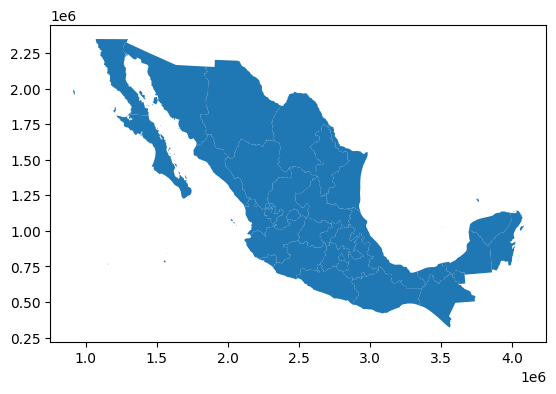

In [76]:
import geopandas as gpd
shapefile = "00ent.shp"
mexico_map = gpd.read_file(shapefile)
mexico_map.plot()


En un archivo shapefile, la columna geometry es una representación geoespacial que describe la forma y posición de los elementos geográficos, como puntos, líneas o polígonos, en un sistema de coordenadas específico. Esta columna es esencial, ya que define la estructura geográfica del dato y permite que los sistemas de información geográfica (SIG) realicen operaciones espaciales como visualizaciones, cálculos de distancias, identificaciones de vecinos, entre otras.

In [77]:
mexico_map.head()

CVEGEO CVE_ENT                NOMGEO  \
0     01      01        Aguascalientes   
1     02      02       Baja California   
2     03      03   Baja California Sur   
3     04      04              Campeche   
4     05      05  Coahuila de Zaragoza   

                                            geometry  
0  POLYGON ((2470517.824 1155028.588, 2470552.248...  
1  MULTIPOLYGON (((1313480.513 1831458.607, 13135...  
2  MULTIPOLYGON (((1694656.344 1227647.637, 16946...  
3  MULTIPOLYGON (((3544897.199 946994.621, 354491...  
4  POLYGON ((2469954.193 1978522.993, 2469982.807...

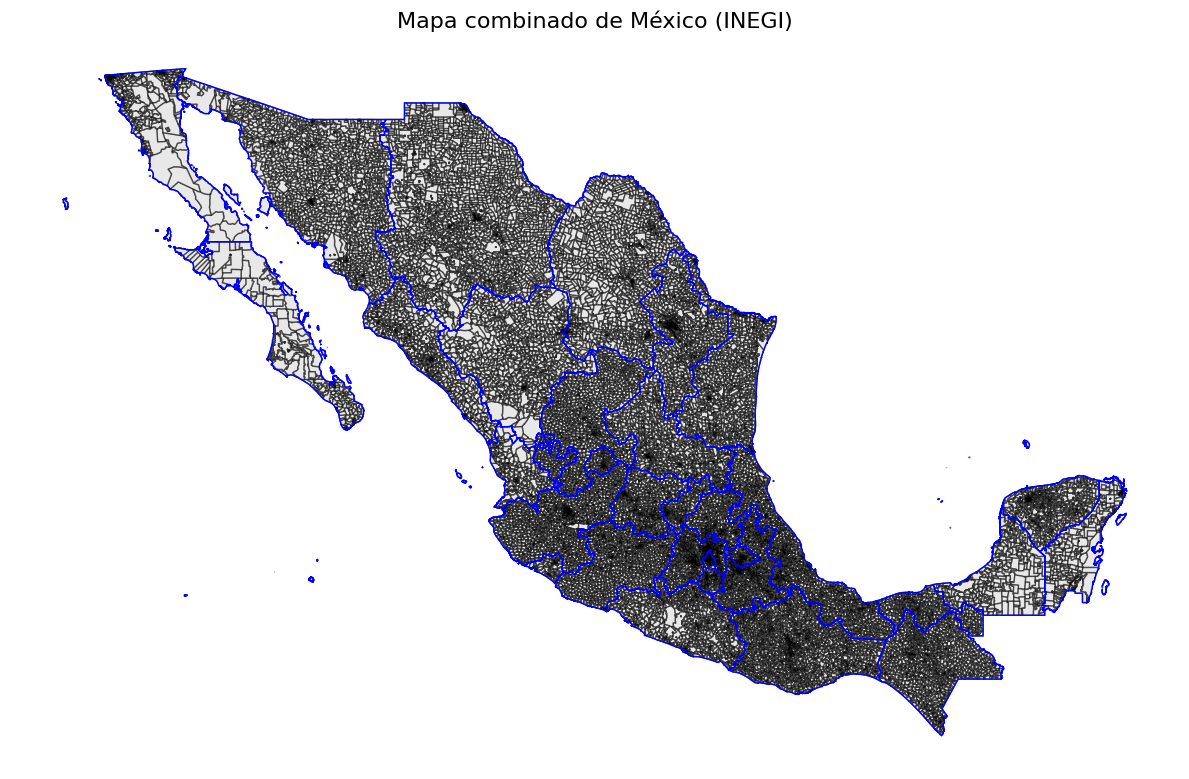

In [79]:
#Mapa combinado
entidades = gpd.read_file("00ent.shp")  # Límites de entidades
municipios = gpd.read_file("00mun.shp")  # Límites de municipios
area_general = gpd.read_file("00a.shp")  # Área general


entidades = entidades.to_crs("EPSG:4326")
municipios = municipios.to_crs(entidades.crs)
area_general = area_general.to_crs(entidades.crs)

fig, ax = plt.subplots(figsize=(12, 10))
area_general.plot(ax=ax, color="lightgray", edgecolor="black", alpha=0.5)
entidades.plot(ax=ax, color="none", edgecolor="blue", linewidth=1)
ax.set_title("Mapa combinado de México (INEGI)", fontsize=16)
ax.axis("off")


plt.tight_layout()
plt.show()


#### Combinacion de datos geográficos

Dado que el objetivo del proyecto, es el realizar un modelo predictivo de delitos se iniciara el ánalisis de los parametros influyentes que serán tomados en cuenta con la siguiente pregunta:


---


¿La cantidad de delitos en los municipios cercanos, tiene una correlación estadísticamente significativa?

---


 Es decir, ¿si un municipio  tiene un indice delictivo alto, los municipios cercanos tienen mayor probabilidad de tener un indice delictivo elevado?

In [83]:
delitos_por_municipio = data_delic_long.groupby(['Municipio'])['Cantidad'].sum().reset_index()

In [84]:
delitos_por_municipio.describe()


Cantidad
count    2334.000000
mean     8310.966797
std     34473.210938
min         0.000000
25%       113.250000
50%       532.500000
75%      2674.500000
max    473209.000000

**Unión de Datos Geoespaciales con Delitos**

Una vez que los datos de delitos fueron agregados por municipio, se procedió a unir esta información con los shapefiles de municipios, utilizando como clave la columna Municipio en los datos de delitos y NOMGEO en el shapefile de municipios. Esta operación asegura que cada municipio tenga asociada su geometría para poder realizar análisis geoespaciales.

In [104]:

delitos_por_municipio['Municipio'] = delitos_por_municipio['Municipio'].astype(str)
municipios['NOMGEO'] = municipios['NOMGEO'].astype(str)


merge_municipios = delitos_por_municipio.merge(municipios[['NOMGEO', 'geometry']], left_on='Municipio', right_on='NOMGEO', how='left')
merge_municipios.head()

Municipio  Cantidad   NOMGEO  \
0     Abalá     128.0    Abalá   
1   Abasolo   12828.0  Abasolo   
2   Abasolo   12828.0  Abasolo   
3   Abasolo   12828.0  Abasolo   
4   Abasolo   12828.0  Abasolo   

                                            geometry  
0  POLYGON ((-89.68444 20.74119, -89.67649 20.734...  
1  POLYGON ((-101.25528 27.22528, -101.23321 27.2...  
2  POLYGON ((-101.59013 20.75604, -101.58929 20.7...  
3  POLYGON ((-100.39267 25.98715, -100.39224 25.9...  
4  POLYGON ((-98.18447 24.42285, -98.14746 24.423...

**Cálculo de la Autocorrelación Espacial**


---



La autocorrelación espacial es una medida que evalúa si los valores de una variable en ubicaciones cercanas están relacionados entre sí. Este concepto es esencial en el análisis de datos geolocalizados, ya que ayuda a entender si las características de un área geográfica influyen en las áreas vecinas. Un ejemplo común es el comportamiento delictivo: ¿un municipio con altos índices delictivos tiende a estar rodeado de municipios con niveles similares?

**El Índice de Moran**
El índice de Moran es una herramienta estadística ampliamente utilizada para medir la autocorrelación espacial global. Fue introducido por Patrick Alfred Pierce Moran en 1950 y se basa en la premisa de que los datos espaciales no son independientes, sino que pueden estar influenciados por su ubicación geográfica. El índice varía entre -1 y +1:

Valores positivos indican una agrupación espacial (municipios similares están

*   Valores positivos indican una agrupación espacial (municipios similares están cerca)
*   Valores negativos reflejan un patrón de dispersión (municipios vecinos son diferentes).
* Un valor cercano a 0 sugiere una distribución aleatoria.

**Matriz de Pesos Espaciales**
El cálculo del índice de Moran requiere una matriz de pesos espaciales, que define las relaciones de proximidad entre las unidades geográficas. Por ejemplo:

* Vecindad contigua: Los municipios que comparten fronteras.
* Distancia: Municipios dentro de un radio específico. Esta matriz actúa como un marco para evaluar cómo la incidencia delictiva de un municipio influye en los municipios vecinos.

**Datos Geolocalizados y Autocorrelación**

Los datos geolocalizados permiten vincular cada municipio con su geometría (polígonos) y cuantificar la cercanía con otros municipios. Al integrar las geometrías con datos de delitos, se puede calcular la autocorrelación espacial para identificar patrones en la distribución delictiva. Un índice de Moran alto, por ejemplo, indicaría que los municipios cercanos tienden a tener tasas delictivas similares, revelando posibles dinámicas regionales que pueden influir en el comportamiento delictivo.

Este análisis no solo facilita la identificación de áreas prioritarias, sino que también contribuye a modelar fenómenos delictivos mediante la incorporación de dinámicas espaciales, fundamentales para un modelo predictivo robusto.



> Moran, P. A. P. (1950). Notes on Continuous Stochastic Phenomena. Biometrika, 37(1/2), 17–23. https://doi.org/10.2307/2332142




In [113]:
# Eliminar filas con geometrías nulas
merge_municipios = merge_municipios[merge_municipios.geometry.notnull()]



In [92]:
##libpysal no es un paquete incluido por default en google collab por lo que se requiere la instalación directa
pip install libpysal


SyntaxError: invalid syntax (<ipython-input-92-ba3aee795eb7>, line 2)

In [93]:
##esda no es un paquete incluido por default en google collab por lo que se requiere la instalación directa
pip install esda

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 5.0 MB/s eta 0:00:00


In [ ]:
pip install splot

In [114]:
import libpysal as ps


w = ps.weights.Queen.from_dataframe(merge_municipios)
w.transform = 'r'

# Calcular el índice de Moran

from esda import Moran
moran = Moran(merge_municipios['Cantidad'], w)




('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 101, ' is an island (no neighbors)')
('WARNING: ', 140, ' is an island (no neighbors)')
('WARNING: ', 295, ' is an island (no neighbors)')
('WARNING: ', 469, ' is an island (no neighbors)')
('WARNING: ', 575, ' is an island (no neighbors)')
('WARNING: ', 593, ' is an island (no neighbors)')
('WARNING: ', 652, ' is an island (no neighbors)')
('WARNING: ', 919, ' is an island (no neighbors)')
('WARNING: ', 960, ' is an island (no neighbors)')
('WARNING: ', 1096, ' is an island (no neighbors)')
('WARNING: ', 1157, ' is an island (no neighbors)')
('WARNING: ', 1217, ' is an island (no neighbors)')
('WARNING: ', 1225, ' is an island (no neighbors)')
('WARNING: ', 1349, ' is an island (no neighbors)')
('WARNING: ', 1371, ' is an island (no neighbors)')
('WARNING: ', 1773, ' is an island (no neighbors)')
('WARNING: ', 1827, ' is an island (no neighbors)')
('WARNING: ', 1921, ' is an island (no neighbors)')
('WARNING: ', 2008, ' i

In [101]:
print(f"Índice de Moran: {moran.I}")
print(f"p-value: {moran.p_sim}")
print(f"z-score: {moran.z_sim}")



Índice de Moran: 0.22645507809975343
p-value: 0.001
z-score: 17.08706779941092


**Interpretación de los resultados del Índice de Moran**

---



**Índice de Moran: 0.226**

Este valor positivo indica una autocorrelación espacial positiva moderada. Esto significa que los municipios con altos índices de delitos tienden a estar cerca de otros municipios con tasas delictivas similares, y lo mismo ocurre con municipios de baja incidencia. En otras palabras, hay una agrupación geográfica de municipios con características delictivas similares.

**p-value: 0.001**

El p-valor bajo indica que el resultado es estadísticamente significativo con un nivel de confianza del 99.9%. Esto significa que es muy poco probable que el patrón espacial observado sea producto del azar.

**z-score: 17.087**

Un puntaje z tan alto refuerza la evidencia de que la autocorrelación espacial observada no es aleatoria. Un z-score positivo sugiere que los valores similares (altos o bajos) están agrupados.

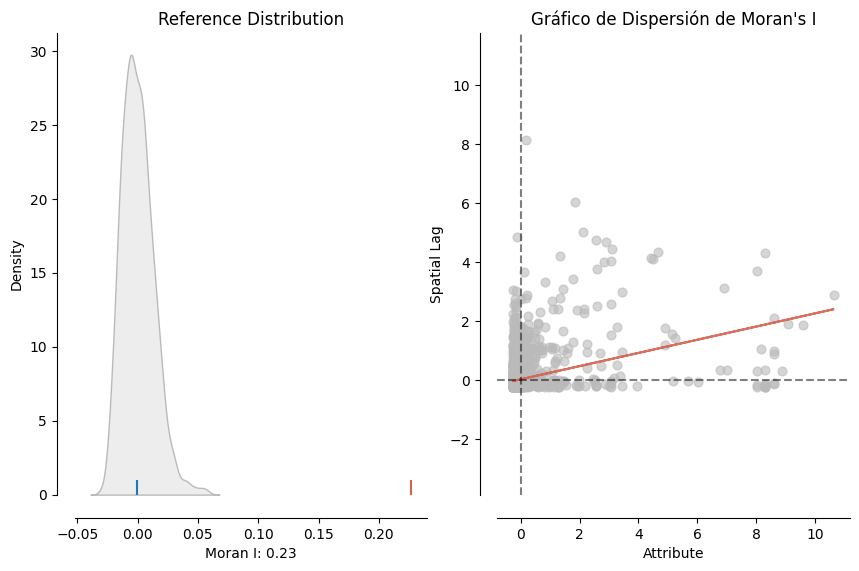

In [103]:
import splot
# Gráfico de dispersión de Moran
plot_moran(moran, zstandard=True, figsize=(10, 6))
plt.title("Gráfico de Dispersión de Moran's I")
plt.show()

**"Considerando lo anterior, se decide que el uso de los datos geolocalizados es un parámetro clave a incluir en el desarrollo de nuestro modelo predictivo.**

Se realiza la union de los datos delincuenciales históricos con los datos geolocalizados a nivel municipal por lo cual se procede a realizar una transformación de datos y posteriormente la unión.

In [97]:
# Cambiar tipo de datos de columnas numéricas
data_delic_long['Año'] = data_delic_long['Año'].astype('int32')
data_delic_long['Clave_Ent'] = data_delic_long['Clave_Ent'].astype('int32')
data_delic_long['Cve. Municipio'] = data_delic_long['Cve. Municipio'].astype('int32')
data_delic_long['Mes'] = data_delic_long['Mes'].astype('int8')
data_delic_long['Cantidad'] = data_delic_long['Cantidad'].astype('float32')

# Convertir columnas de texto a categorías
data_delic_long['Entidad'] = data_delic_long['Entidad'].astype('category')
data_delic_long['Municipio'] = data_delic_long['Municipio'].astype('category')
data_delic_long['Bien jurídico afectado'] = data_delic_long['Bien jurídico afectado'].astype('category')
data_delic_long['Tipo de delito'] = data_delic_long['Tipo de delito'].astype('category')
data_delic_long['Subtipo de delito'] = data_delic_long['Subtipo de delito'].astype('category')
data_delic_long['Modalidad'] = data_delic_long['Modalidad'].astype('category')


In [119]:
data_delic_long = data_delic_long.merge(
    municipios[['NOMGEO', 'geometry']],
    left_on='Municipio',
    right_on='NOMGEO',
    how='left'
)

In [120]:
data_delic_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32804716 entries, 0 to 32804715
Data columns (total 14 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   Año                     int32         
 1   Clave_Ent               int32         
 2   Entidad                 category      
 3   Cve. Municipio          int32         
 4   Municipio               object        
 5   Bien jurídico afectado  category      
 6   Tipo de delito          category      
 7   Subtipo de delito       category      
 8   Modalidad               category      
 9   Mes                     int8          
 10  Cantidad                float32       
 11  Fecha                   datetime64[ns]
 12  NOMGEO                  object        
 13  geometry                geometry      
dtypes: category(5), datetime64[ns](1), float32(1), geometry(1), int32(3), int8(1), object(2)
memory usage: 1.6+ GB


# Construcción de Red Neuronal

**Redes Neuronales y su Aplicación a Series Temporales**

Las redes neuronales son un tipo de modelo de aprendizaje automático inspirado en el cerebro humano, compuesto por capas de nodos interconectados que procesan información de manera jerárquica. Dentro del ámbito de las series temporales, se utilizan para modelar dependencias secuenciales y predecir el valor de una variable en función de observaciones pasadas.

En problemas de series temporales, las redes neuronales recurrentes (RNN) han sido ampliamente utilizadas debido a su capacidad para manejar secuencias de datos. Sin embargo, debido a los problemas de desvanecimiento y explosión del gradiente, las Long Short-Term Memory (LSTM) y Gated Recurrent Units (GRU) se han convertido en las arquitecturas más populares, ya que mejoran la capacidad de recordar dependencias a largo plazo sin sufrir estos problemas (Chung et al., 2014).

**Modelo GRU (Gated Recurrent Unit)**
La arquitectura GRU es una variante simplificada de la LSTM que utiliza puertas de actualización y restablecimiento para regular la información que se transmite a través de las capas. Este modelo es eficiente para tareas de predicción de series temporales debido a su capacidad de capturar relaciones de largo plazo sin necesidad de redes profundas (Cho et al., 2014). Las GRU han demostrado ser especialmente útiles para tareas que involucran datos secuenciales, como la predicción de delitos en función del tiempo.

**Características clave del GRU:**

* Puerta de actualización: Decide qué información se debe actualizar a partir del estado anterior y la entrada actual.
* Puerta de restablecimiento: Controla la cantidad de información pasada que debe olvidarse para centrarse en los eventos más recientes.
* Simplicidad y eficiencia: Al reducir la complejidad de las LSTM, las GRU requieren menos recursos computacionales y pueden entrenarse más rápido, manteniendo un rendimiento similar o superior en ciertas tareas de secuencias temporales.

In [130]:

import numpy as np
from sklearn.preprocessing import MinMaxScaler
from datetime import timedelta


In [132]:
data_delic_long['Año'] = data_delic_long['Fecha'].dt.year
data_delic_long['Mes'] = data_delic_long['Fecha'].dt.month
data_delic_long['Día'] = data_delic_long['Fecha'].dt.day
data_delic_long['Semana'] = data_delic_long['Fecha'].dt.isocalendar().week

**Segmentación de los Datos:**
La segmentación de los datos históricos en secuencias de tiempo es esencial para problemas de series temporales, ya que permite al modelo aprender las dependencias temporales. En este caso, cada secuencia se construye a partir de los 12 meses anteriores, utilizando las columnas relevantes como características (Cantidad_scaled) para predecir el valor de la cantidad de delitos en el siguiente mes.

In [ ]:
# Normalización de la columna 'Cantidad' con MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data_delic_long['Cantidad_scaled'] = scaler.fit_transform(data_delic_long[['Cantidad']])

# Crear una columna de identificación de municipio
municipios = data_delic_long['Municipio'].unique()

# Prepara las listas para las secuencias
X_seq = []
y_seq = []
window_size = 12  # Número de meses (ventana de tiempo)

# Crear las secuencias
for municipio in municipios:
    municipio_data = data_delic_long[data_delic_long['Municipio'] == municipio].sort_values('Fecha')

    for i in range(len(municipio_data) - window_size):
        # Crear la secuencia de características (X) y el valor objetivo (y)
        X_seq.append(municipio_data.iloc[i:i+window_size][['Cantidad_scaled']].values)
        y_seq.append(municipio_data.iloc[i+window_size]['Cantidad_scaled'])

# Convertir a numpy arrays
X_seq = np.array(X_seq)
y_seq = np.array(y_seq)


**Entrenamiento del Modelo**
El modelo GRU fue implementado utilizando Keras, una API de alto nivel para redes neuronales en Python. La estructura del modelo es la siguiente:

Capa GRU: Se utiliza una capa GRU con 64 unidades para capturar las dependencias temporales a largo plazo.
Capa densa: Después de la capa GRU, se agrega una capa densa para realizar la predicción final de la cantidad de delitos.
Función de pérdida (MSE): Se utilizó el error cuadrático medio (MSE) como la función de pérdida, que es comúnmente utilizada en problemas de regresión para minimizar la diferencia entre las predicciones y los valores reales.
Entrenamiento y Evaluación: El modelo fue entrenado durante 10 épocas, utilizando el 80% de los datos para el entrenamiento y el 20% restante para la validación. El rendimiento del modelo se evaluó utilizando la función de pérdida en el conjunto de prueba.

In [ ]:
# División en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
train_size = int(len(X_seq) * 0.8)

X_train, X_test = X_seq[:train_size], X_seq[train_size:]
y_train, y_test = y_seq[:train_size], y_seq[train_size:]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.optimizers import Adam

# Construcción del modelo GRU
model = Sequential()
model.add(GRU(units=64, return_sequences=False, input_shape=(window_size, X_train.shape[2])))
model.add(Dense(1))  # Predicción de la cantidad de delitos (una sola salida)

# Compilación del modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Entrenamiento del modelo
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluación del modelo
loss = model.evaluate(X_test, y_test)
print(f'Model Loss: {loss}')


In [ ]:
# Realizar predicciones
predictions = model.predict(X_test)

# Invertir la escala de las predicciones para obtener los valores originales
predictions = scaler.inverse_transform(predictions)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

# Mostrar las primeras 10 predicciones vs valores reales
for i in range(10):
    print(f"Predicción: {predictions[i]}, Real: {y_test_original[i]}")


**Resultados y Aplicación del Modelo**
Una vez entrenado el modelo, se realizaron predicciones de la cantidad de delitos para los municipios en el conjunto de prueba. Las predicciones fueron desnormalizadas para obtener los valores originales, permitiendo una comparación directa con los valores reales.

Este enfoque es adecuado para predecir no solo los delitos pasados, sino también los futuros, utilizando las tendencias temporales de delitos pasados. Los resultados obtenidos permiten ajustar las políticas de seguridad pública a nivel municipal, proporcionando predicciones sobre la evolución futura de los delitos.

**Consideraciones Geoespaciales y Futuro del Modelo**
Dado que los datos contienen información geoespacial en la columna geometry, se pueden explorar modelos que incorporen estos datos geográficos, como Redes Neuronales Convolucionales (CNN) o técnicas más avanzadas de aprendizaje profundo. Sin embargo, el enfoque de GRU, centrado en las dependencias temporales, ha mostrado ser eficaz para este caso.

---
# **Referencias**

---


* Moran, P. A. P. (1950). Notes on Continuous Stochastic Phenomena. Biometrika, 37(1/2), 17–23. https://doi.org/10.2307/2332142

* Cho, K., et al. (2014). Learning Phrase Representations using RNN Encoder-Decoder for Statistical Machine Translation. In Proceedings of the 2014 Conference on Empirical Methods in Natural Language Processing (EMNLP), 1724-1734.
* Chung, J., Gulcehre, C., Cho, K., & Bengio, Y. (2014). Empirical Evaluation of Gated Recurrent Neural Networks on Sequence Modeling. arXiv:1412.3555.
* Vaswani, A., Shazeer, N., Parmar, N., Uszkoreit, J., Jones, L., Gomez, A., Kaiser, Ł., & Polosukhin, I. (2017). Attention Is All You Need. In Advances in Neural Information Processing Systems (NeurIPS 2017), 30.
